<a href="https://colab.research.google.com/github/carlosfloar/liveprojectManning/blob/main/Project1_M1_starterFile_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mileston 1 of **Basic Deep Learning Techniques for Image Classification** 




Topic: Multi-layer Perceptron for image classification

Autour: Xiaotian Han



In this milestone, you will implement the multi-layer preceptron for image classification. The step is listed as follows:

1. Load cifar10 dataset
2. Explore data
3. Prepare the dataset
4. Build the MLP model
5. Explore the trained model
6. Build and train the CNN model

Intructions:
1. Upload this notebook to the google colab and 
2. Set the runtime to GPU (Runtime -> Change runtime type -> GPU ) 
2. Run the first cell to install the package
2. You should complete the code between # Your code here
3. The output of the cell is the expected output of the code 

In [ ]:
%%capture
!pip install tensorflow==2.5.0

In [ ]:
# import the python packages
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Layer, Dense, ReLU, Softmax, MaxPooling2D, Flatten, Conv2D

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

print( "tf.__version__:", tf.__version__ )

tf.__version__: 2.5.0


## Load dataset

In [ ]:
# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


## Explore data

#### Plot one picture

(-0.5, 31.5, 31.5, -0.5)

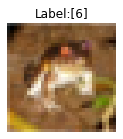

In [ ]:
(x_train, y_train), (x_test, y_test) =  cifar10.load_data()
image = x_train[0]
label = y_train[0]

# Plot the original image
plt.figure( figsize=(2,2) )
plt.tight_layout()
plt.imshow(x_train[0].reshape(32,32,3), interpolation='none')
plt.title("Label:{}".format(y_train[0]))
plt.axis('off')

#### Plot first 12 images

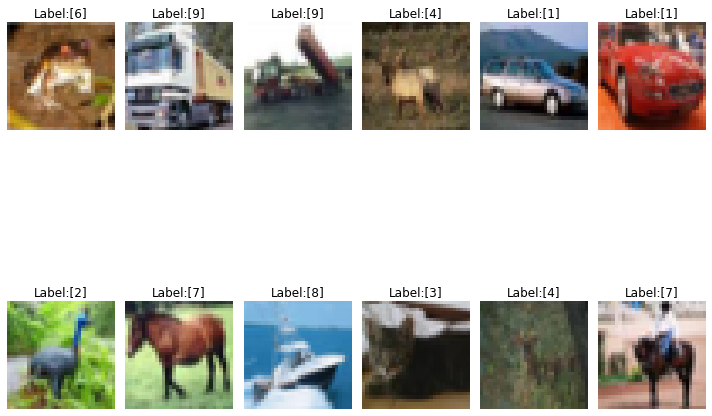

In [ ]:
# plot first 12 images
# Your code here
import matplotlib.pyplot as plt
total_images = 12
num_row  = 2
num_col = total_images // num_row
fig = plt.figure(figsize=(10, 10))
for i in range(total_images):
  ax = plt.subplot(num_row, num_col, i + 1)
  plt.imshow(x_train[i], interpolation='none')
  plt.title("Label:{}".format(y_train[i]))
  plt.axis("off")
fig.tight_layout()
plt.show()
# Your code here

## Data Preparation

#### Scale

In [ ]:
# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#### Reshape

In [ ]:
# reshape
x_train = x_train.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)
print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 3072)
Training label shape: (50000, 1)
Testing image shape: (10000, 3072)
Testing label shape: (10000, 1)


## Build MLP model

#### Build model with Functional API

In [ ]:
# An example of keras functional API
# inputs = tf.keras.Input(shape=(784,))
# x = tf.keras.layers.Dense(64, activation="relu")(x)
# outputs = tf.keras.layers.Dense(64, activation="relu")(x)

# Build your MLP model with Keras funcational API
inputs = Input(shape=(3072,))
# Your code here
x = Dense(1024,activation="relu")(inputs)
x = Dense(256, activation="relu")(x)
# Your code here
outputs = Dense(10, activation="softmax")(x)
mlp_model = Model(inputs, outputs, name = "mlp_model")

## Explore Model

In [ ]:
# Call model.summary() to print a useful summary of the model, which includes:
# * Name and type of all layers in the model.
# * Output shape for each layer.
# * Number of weight parameters of each layer.
mlp_model.summary()

Model: "mlp_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 3,411,722
Trainable params: 3,411,722
Non-trainable params: 0
_________________________________________________________________


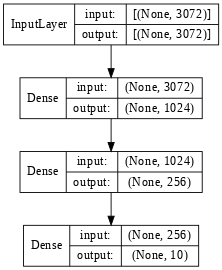

In [ ]:
# converts a Keras model to dot format and plot an image
tf.keras.utils.plot_model(mlp_model, show_layer_names=False, show_shapes=True, expand_nested=True, dpi=64)

#### Train MLP model with Keras.Molde.fit() API

In [ ]:
# compile the model and train the model
mlp_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
mlp_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.20)

Epoch 1/10
625/625 [==============================] - 3s 4ms/step - loss: 1.9401 - accuracy: 0.3066 - val_loss: 1.7842 - val_accuracy: 0.3577
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.7155 - accuracy: 0.3850 - val_loss: 1.7255 - val_accuracy: 0.3812
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 1.6244 - accuracy: 0.4200 - val_loss: 1.6391 - val_accuracy: 0.4168
Epoch 4/10
625/625 [==============================] - 3s 5ms/step - loss: 1.5631 - accuracy: 0.4397 - val_loss: 1.6092 - val_accuracy: 0.4231
Epoch 5/10
625/625 [==============================] - 4s 6ms/step - loss: 1.5159 - accuracy: 0.4581 - val_loss: 1.5735 - val_accuracy: 0.4428
Epoch 6/10
625/625 [==============================] - 4s 7ms/step - loss: 1.4721 - accuracy: 0.4722 - val_loss: 1.5430 - val_accuracy: 0.4542
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 1.4475 - accuracy: 0.4855 - val_loss: 1.5306 - val_accuracy: 0.4589
Epoch 

#### Test MLP model with Keras.Molde.evaluate() API

In [ ]:
# evaluate the model
test_loss, test_acc = mlp_model.evaluate(x_test,  y_test, verbose=1)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 1.4864 - accuracy: 0.4705
Test loss:  1.4863977432250977
Test accuracy:  0.47049999237060547


#### Visualize the prediciton result

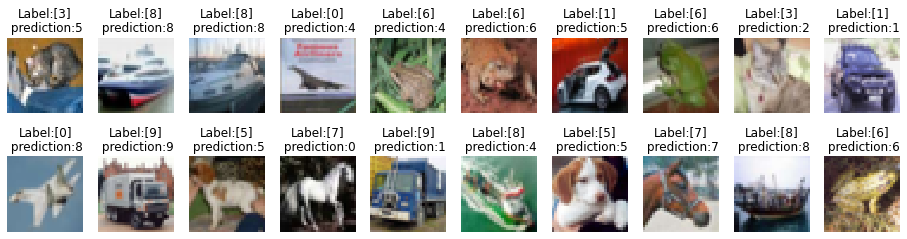

In [ ]:
# make prediction and plot the results
y_predictions = mlp_model.predict( x_test[:32] ).argmax(axis = 1)

plt.figure( figsize=(16,4) )
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("Label:{}\n prediction:{}".format(y_test[i], y_predictions[i]))
    plt.axis('off')

In [ ]:
test_predictions = mlp_model.predict(x_test[:2])
test_predictions

array([[0.0276519 , 0.01133561, 0.18829747, 0.27958998, 0.10902674,
        0.3012424 , 0.05718687, 0.00701818, 0.01743509, 0.00121571],
       [0.04313185, 0.23408337, 0.00888384, 0.00411533, 0.00116251,
        0.00106558, 0.00110934, 0.00081596, 0.5590504 , 0.1465818 ]],
      dtype=float32)

## Data Preparation for CNN





In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

print('Training image shape:', x_train.shape)
print('Training label shape:', y_train.shape)
print('Testing image shape:', x_test.shape)
print('Testing label shape:', y_test.shape)

Training image shape: (50000, 32, 32, 3)
Training label shape: (50000, 1)
Testing image shape: (10000, 32, 32, 3)
Testing label shape: (10000, 1)


## Build CNN model





In [ ]:
# An example of keras functional API
# inputs = tf.keras.Input(shape=(784,))
# x = tf.keras.layers.Dense(64, activation="relu")(x)
# outputs = tf.keras.layers.Dense(64, activation="relu")(x)

# Build your CNN model with Keras funcational API
# Your code here
inputs = tf.keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, activation="softmax")(x)
# Your code here
cnn_model = Model(inputs, outputs, name = "cnn_model")
cnn_model.summary()

Model: "cnn_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0 

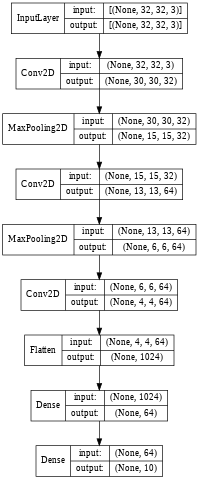

In [ ]:
# Converts a Keras model to dot format and plot an image
tf.keras.utils.plot_model(cnn_model, show_layer_names=False, show_shapes=True, expand_nested=True, rankdir='TB', dpi=48)

In [ ]:
# compile the model and train the model
# Your code here
cnn_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
# Your code here
cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.20)

Epoch 1/10
625/625 [==============================] - 6s 5ms/step - loss: 1.6853 - accuracy: 0.3900 - val_loss: 1.3832 - val_accuracy: 0.5032
Epoch 2/10
625/625 [==============================] - 3s 5ms/step - loss: 1.2920 - accuracy: 0.5429 - val_loss: 1.2353 - val_accuracy: 0.5609
Epoch 3/10
625/625 [==============================] - 3s 5ms/step - loss: 1.1110 - accuracy: 0.6113 - val_loss: 1.0637 - val_accuracy: 0.6264
Epoch 4/10
625/625 [==============================] - 3s 4ms/step - loss: 0.9931 - accuracy: 0.6530 - val_loss: 1.0309 - val_accuracy: 0.6486
Epoch 5/10
625/625 [==============================] - 3s 5ms/step - loss: 0.8977 - accuracy: 0.6852 - val_loss: 0.9196 - val_accuracy: 0.6744
Epoch 6/10
625/625 [==============================] - 3s 5ms/step - loss: 0.8240 - accuracy: 0.7141 - val_loss: 0.9352 - val_accuracy: 0.6742
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.7628 - accuracy: 0.7344 - val_loss: 0.9287 - val_accuracy: 0.6845
Epoch 

#### Test MLP model with Keras.Molde.evaluate() API

In [ ]:
# evaluate the model
test_loss, test_acc = cnn_model.evaluate(x_test,  y_test, verbose=1)
print('Test loss: ', test_loss)
print('Test accuracy: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.8844 - accuracy: 0.7067
Test loss:  0.884414553642273
Test accuracy:  0.7067000269889832
